## Importing Library
#### Predict home prices in Bangalore based on features like bathrooms, bedrooms, location, and area using machine learning models trained on collected real estate data.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Data Loading

In [9]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df.shape

(13320, 9)

In [11]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df1 = df.drop(["area_type", "availability","society", "balcony"], axis = 'columns')
df1.shape

(13320, 5)

## Data Cleaning

In [14]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Feature Engineering 

In [24]:
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))

/var/folders/4_/963sb9kd7w5f9h6gn3dy_mzr0000gn/T/ipykernel_69810/1652976565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [25]:
df2.shape

(13246, 6)

In [26]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [27]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [28]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
def isFloat(x):
    try:
        float(x)
        return True
    except: 
        return False

In [31]:
df2[~df2["total_sqft"].apply(isFloat)].total_sqft.unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [32]:
def convert_range_to_float(x):
    tokens = x.split(" - ")
    if (len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [48]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(convert_range_to_float)
df3 = df3[df3.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [49]:
df3.describe()

,total_sqft,bath,price,bhk
count,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,112.276178,2.800833
std,1237.323445,1.338915,149.175995,1.292843
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,71.850000,3.000000
75%,1672.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


## Feature Engineering

In [50]:
df4 = df3.copy()
df4["price_per_sqft"] = df4["price"] * 100000 / df4['total_sqft']
df4.head()
df4.to_csv("bhp.csv", index = False)

In [51]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending = False)
location_stats.values.sum()

13200

In [52]:
len(location_stats[location_stats > 10])

240

In [53]:
(len(df4.location.unique()))

1287

## Dimensionality Reduction

In [54]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby(['location'])['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [55]:
len(location_stats[location_stats<=10])

1047

In [56]:
location_stats_less_than10 = location_stats[location_stats<=10]
location_stats_less_than10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [57]:
df4["location"] = df4["location"].apply(lambda x: 'Unusual' if x in location_stats_less_than10 else x)
len(df4["location"].unique())

241

#### Reduced the row from 1304 into 242

## Outlier Detection and Removal

In [58]:
df4[df4["total_sqft"]/df4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Unusual,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Unusual,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [59]:
df4.shape

(13200, 7)

In [60]:
df5 = df4[~(df4["total_sqft"]/df4.bhk < 300)]
df5.shape

(12456, 7)

In [62]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [88]:
def remove_outliers_price_ps(df):
    our_df = pd.DataFrame()
    for key, groupdf in df.groupby('location'):
        mn = np.mean(groupdf.price_per_sqft)
        st = np.std(groupdf.price_per_sqft)
        reduced_df = groupdf[(groupdf.price_per_sqft > (mn - st)) & (groupdf.price_per_sqft <= (mn + st))]
        our_df = pd.concat([our_df, reduced_df], ignore_index = True)
    return our_df
df6 = remove_outliers_price_ps(df5)  
df6.shape

(10242, 7)

In [99]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize']= (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 BHK", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "*",color = "green", label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

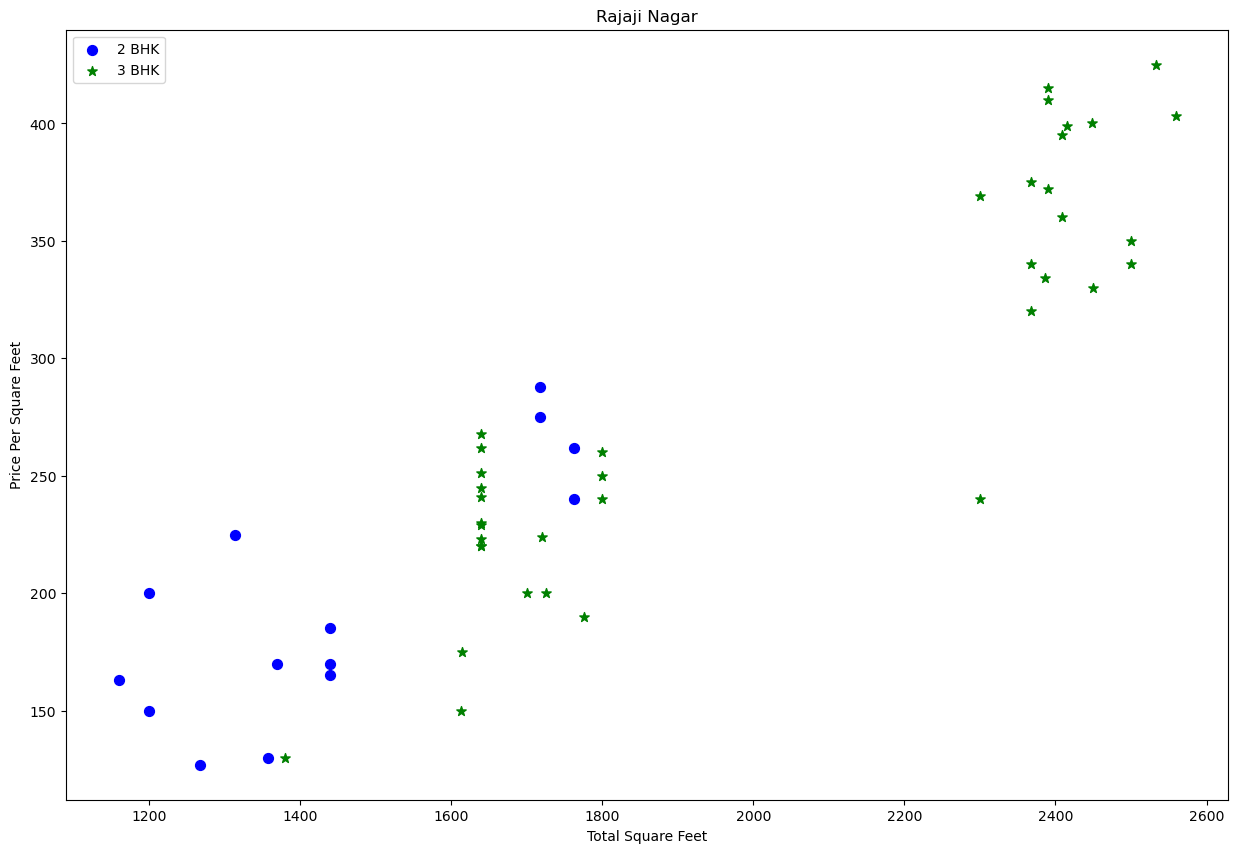

In [100]:
plot_scatter(df6, "Rajaji Nagar")

In [104]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7317, 7)

Text(0, 0.5, 'Count')

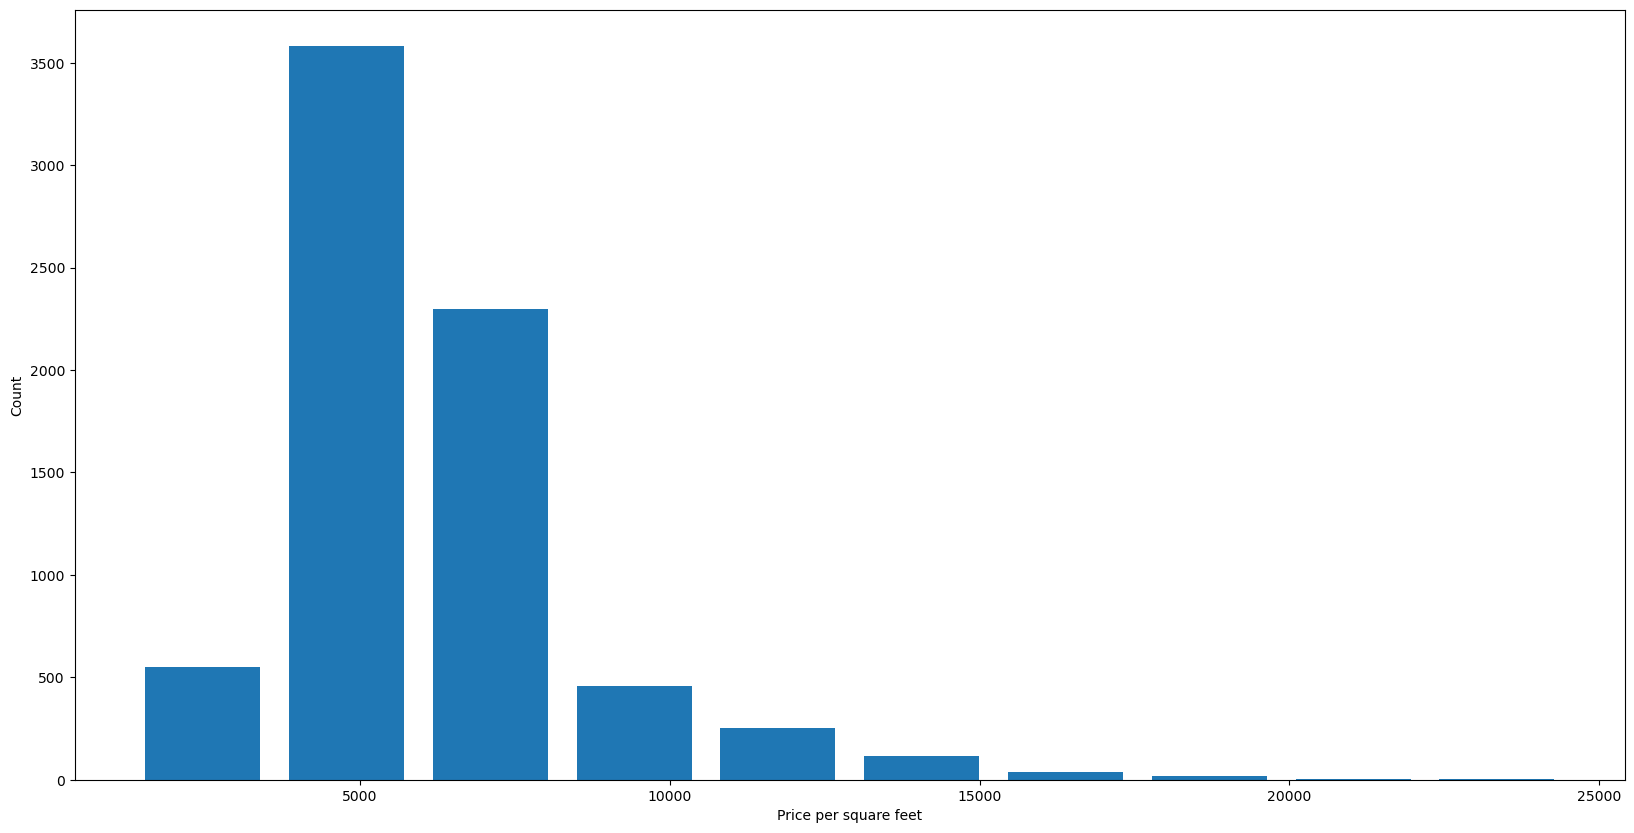

In [105]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")


In [106]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

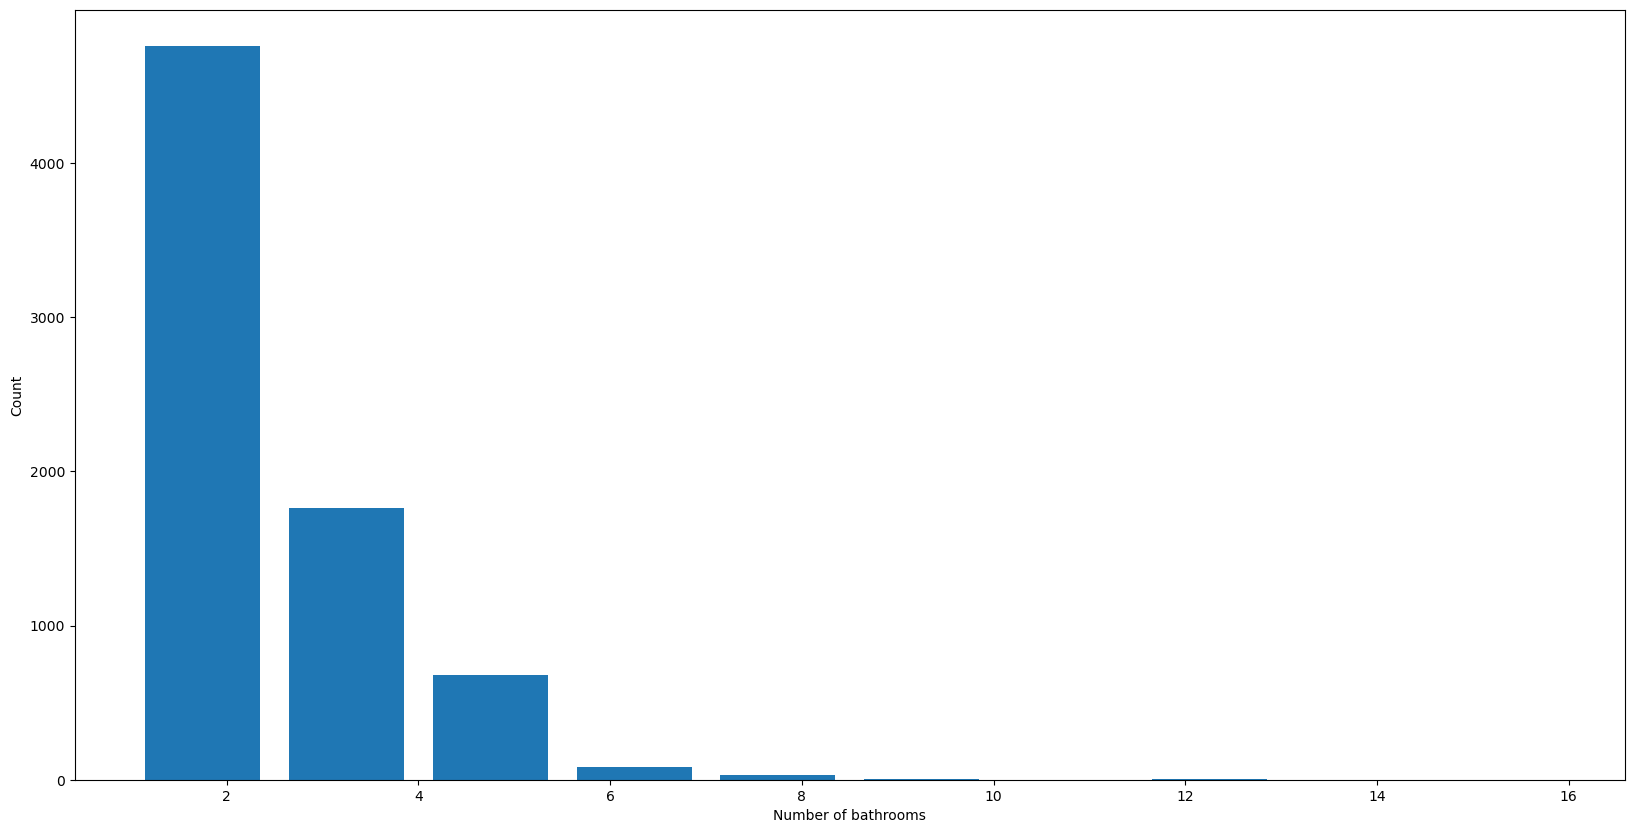

In [107]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [108]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7378,Unusual,10 BHK,12000.0,12.0,525.0,10,4375.000000
7467,Unusual,16 BHK,10000.0,16.0,550.0,16,5500.000000
8201,Unusual,11 BHK,6000.0,12.0,150.0,11,2500.000000
8532,Unusual,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [109]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape

(7239, 7)

In [146]:
df9 = df8.drop(['price_per_sqft', 'size'], axis = 'columns')
df9.shape
df9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2
10232,Yeshwanthpur,1692.0,3.0,108.0,3
10234,Yeshwanthpur,2500.0,5.0,185.0,6
10239,Yeshwanthpur,1855.0,3.0,135.0,3


In [147]:
df9


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2
10232,Yeshwanthpur,1692.0,3.0,108.0,3
10234,Yeshwanthpur,2500.0,5.0,185.0,6
10239,Yeshwanthpur,1855.0,3.0,135.0,3


## Use One Hot Encoding for Location


In [148]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [150]:
df10 = pd.concat([df9, dummies.drop('Unusual', axis = 'columns')], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
df11 = df10.drop('location', axis = 'columns')

In [152]:
df11.shape

(7239, 244)

X = df11.drop('price', axis = "columns")
X

In [157]:
y = df11.price
len(y)

7239

In [159]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [160]:
X.shape

(7239, 243)

In [165]:
len(y)
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [167]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8147199988629781

## K Fold Cross Validation

In [173]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv= cv)

array([0.8804694 , 0.86296908, 0.76376362, 0.77233274, 0.87868477])

In [174]:
def price_predict(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [175]:
price_predict('1st Phase JP Nagar', 1000, 2, 2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.23698357215058

In [176]:
import pickle
with open('Banglore_home_prices_model1.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [177]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns1.json", "w") as f:
    f.write(json.dumps(columns))